In [ ]:
import numpy as np #Import Numpy
import matplotlib.pyplot as plt #Import Matplotlib
import pandas as pd #Import pandas
import seaborn as sns #Import Seaborn

# Importing oir google drive
from google.colab import drive

drive.mount("/content/gdrive")
!pwd # Print working directory

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/IA avanzada para la ciencia de datos/Titanic Team


In [ ]:
# We look the path of our csv
%cd "/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team"
!ls # List files located in defined folder

/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team
 new_test.csv	'NN Titanic Team.ipynb'   TitanicModel.csv
 new_train.csv	'Titanic cleaned data'


In [ ]:
train_data= pd.read_csv("/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/new_train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_S,Embarked_Q,Embarked_C
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,Mr,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C,Mrs,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S,Mrs,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,Mr,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,S,Rev,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,S,Miss,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.0,1,2,W./C. 6607,23.4500,0,S,Miss,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,C,Mr,0,0,1


In [ ]:
test_data= pd.read_csv("/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/new_test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_S,Embarked_Q,Embarked_C
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,Mr,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,Mrs,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,Mr,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,Mr,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,Mrs,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,0,S,Mr,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,1,C,Dona,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,Mr,1,0,0
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,0,S,Mr,1,0,0


In [ ]:
#Cleaning the categorical columns, and
X_train=train_data.drop(["Name","Ticket","Cabin","Title","Embarked"],axis=1,errors="ignore")
X_test=test_data.drop(["Name","Ticket","Cabin","Title","Embarked"],axis=1,errors="ignore")


X_train['Sex'] = X_train['Sex'].replace({0: 1, 1: 0})
X_test['Sex'] = X_test['Sex'].replace({0: 1, 1: 0})

In [ ]:
X_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
0,1,0,3,0,22.0,1,0,7.2500,1,0,0
1,2,1,1,1,38.0,1,0,71.2833,0,0,1
2,3,1,3,1,26.0,0,0,7.9250,1,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0,0
4,5,0,3,0,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,0,0
887,888,1,1,1,19.0,0,0,30.0000,1,0,0
888,889,0,3,1,21.0,1,2,23.4500,1,0,0
889,890,1,1,0,26.0,0,0,30.0000,0,0,1


In [ ]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,1,0,0
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,1,0,0
4,896,3,1,22.0,1,1,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.0500,1,0,0
414,1306,1,1,39.0,0,0,108.9000,0,0,1
415,1307,3,0,38.5,0,0,7.2500,1,0,0
416,1308,3,0,30.0,0,0,8.0500,1,0,0


In [ ]:
#See the null values
X_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
dtype: int64

In [ ]:
#See the null values
X_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
dtype: int64

# Neural Network

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [ ]:
# Define the Features and Target
X = X_train.drop(['PassengerId', 'Survived'], axis=1,errors="ignore")
y = X_train['Survived']

Xt = X_test.drop(['PassengerId'], axis=1,errors="ignore")
# Split dataset
X_train_Sample, X_test_Sample, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)


In [ ]:
X_train_Sample

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
363,3,0,35.0,0,0,7.0500,1,0,0
852,3,1,9.0,1,1,15.2458,0,0,1
626,2,0,57.0,0,0,12.3500,0,1,0
858,3,1,24.0,0,3,19.2583,0,0,1
260,3,0,30.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...
658,2,0,23.0,0,0,13.0000,1,0,0
578,3,1,35.0,1,0,14.4583,0,0,1
728,2,0,25.0,1,0,26.0000,1,0,0
391,3,0,21.0,0,0,7.7958,1,0,0


In [ ]:
columna_0 = X_train_Sample.iloc[:, 0]
columna_0

363    3
852    3
626    2
858    3
260    3
      ..
658    2
578    3
728    2
391    3
20     2
Name: Pclass, Length: 801, dtype: int64

In [ ]:
def set_nn_model_architecture_1():
  # Define Model
  model = Sequential(name='my_sequential_model_1')
  # Hidden Layer 1: Fully-connected layer w/64 units. Need to specify the
  # expected input data shape (4,), initialize parameters, & set activation function
  model.add(Dense(units=64, input_shape=(X_train_Sample.shape[1],), activation='relu',
                kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                bias_initializer='ones', name='hiddenlayer1'))
  # Rest of the hidden layers configurations (units and activations functions)
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer2'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer3'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer4'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer5'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer6'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer7'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer8'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer9'))
  model.add(Dense(units=2, activation = 'softmax', name='outputlayer'))
  model.summary()
  return model


model_1 = set_nn_model_architecture_1()

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                640       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer6 (Dense)        (None, 64)                8256      
                                                                 
 hiddenlayer7 (Dense)        (None, 64)      

 The model is created using Keras with TensorFlow and consists of multiple hidden layers and an output layer for binary classification problems. Each hidden layer uses the ReLU activation function and its weight parameters are initialized with a HeUniform initialization. The output layer has two units with a softmax activation function, suitable for binary problems.

In [ ]:
# Define optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.0001)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In this part of the code, two optimizers, Stochastic Gradient Descent (SGD) and Adam, are defined for Model 1 of the neural network. The SGD optimizer is set with a learning rate of 0.0001, while the Adam optimizer is also set with the same learning rate.

 Model 1 is compiled using the Adam optimizer, a categorical cross-entropy loss function (suitable for classification problems) and it is specified that accuracy metrics should be calculated during training.

#Train the model and print progress

In [ ]:
from keras.utils import to_categorical
# Convert y_data to one-hot encoding for binary classification
y_data = to_categorical(y_train, num_classes=2)

training_history_1 = model_1.fit(X_train_Sample, y_data, epochs=800, validation_split=0.15, batch_size=40)

Epoch 1/800
17/17 [==============================] - 2s 24ms/step - loss: 0.6518 - accuracy: 0.6529 - val_loss: 0.5837 - val_accuracy: 0.7025
Epoch 2/800
17/17 [==============================] - 0s 7ms/step - loss: 0.6136 - accuracy: 0.6721 - val_loss: 0.5505 - val_accuracy: 0.7273
Epoch 3/800
17/17 [==============================] - 0s 7ms/step - loss: 0.6075 - accuracy: 0.6824 - val_loss: 0.5498 - val_accuracy: 0.7355
Epoch 4/800
17/17 [==============================] - 0s 8ms/step - loss: 0.5976 - accuracy: 0.6897 - val_loss: 0.5576 - val_accuracy: 0.7355
Epoch 5/800
17/17 [==============================] - 0s 7ms/step - loss: 0.5970 - accuracy: 0.7074 - val_loss: 0.5471 - val_accuracy: 0.7438
Epoch 6/800
17/17 [==============================] - 0s 7ms/step - loss: 0.5876 - accuracy: 0.7118 - val_loss: 0.5420 - val_accuracy: 0.7603
Epoch 7/800
17/17 [==============================] - 0s 6ms/step - loss: 0.5865 - accuracy: 0.7206 - val_loss: 0.5663 - val_accuracy: 0.7438
Epoch 8/800


The Keras function 'to_categorical' is used to perform the one-hot encoding of the 'y_train' labels, which is crucial in binary classification problems. This converts the labels into a format suitable for the neural network, where each label is represented as a binary vector with a dimension equal to the number of classes (in this case, 2). Subsequently, training of Model 1 is initiated using the input data 'X_train_Sample' and the encoded labels 'y_data'. The training is performed for 800 epochs, with a 15% split of the data for validation at each epoch and a batch size of 40 examples.

# Learning Curve

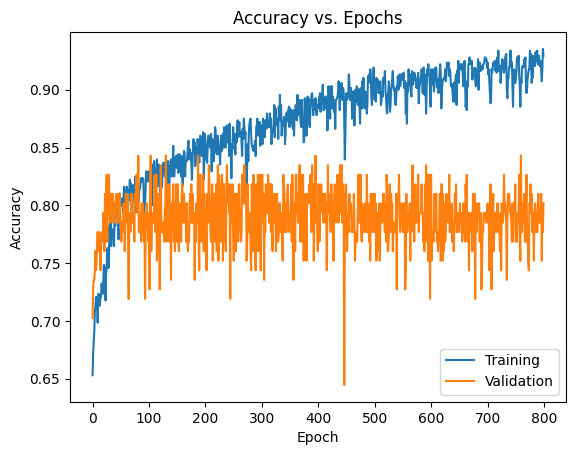

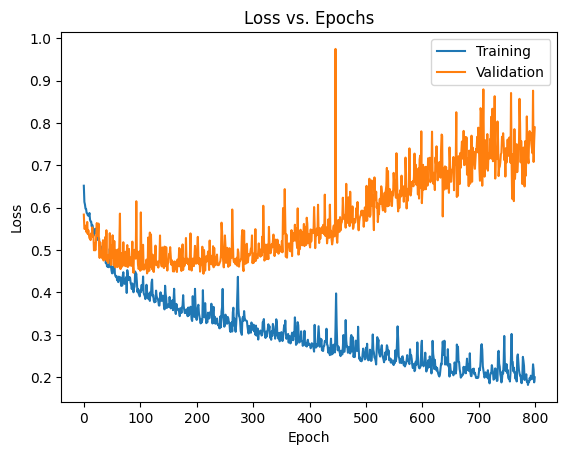

In [ ]:
def plot_acc_loss(training_history):
  plt.plot(training_history.history['accuracy'])
  plt.plot(training_history.history['val_accuracy'])
  # plt.ylim([0, 1])
  plt.title('Accuracy vs. Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show()
  plt.plot(training_history.history['loss'])
  plt.plot(training_history.history['val_loss'])
  plt.title('Loss vs. Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()
plot_acc_loss(training_history_1)

In the first graph we can see how in the training test, we have an increase up to 95% for the precision but when we go to the validation test, we can see that this value is maintained at 75%, when we see the graph below and we see the loss, in the training test as the epochs pass, this value decreases, but with the validation test this value increases a lot.

# Introducing Dropout and Batch Normalization to reduce Overfitting

In [ ]:
def set_nn_model_architecture_2():
  model = Sequential(name='my_sequential_model_1')
  model.add(Dense(units=64,  input_shape=(X_train_Sample.shape[1],), activation='relu', kernel_initializer=tf.keras.initializers.HeUniform(seed=0), bias_initializer='ones', name='hiddenlayer1'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer2'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer3'))
  model.add(Dropout(rate=0.3, seed=44, name='dropout1'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer4'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer5'))
  model.add(BatchNormalization(name='batch_normalization'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer6'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer7'))
  model.add(Dropout(rate=0.3, seed=44, name='dropout2'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer8'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer9'))
  model.add(Dense(units=2, activation = 'softmax', name='outputlayer'))
  model.summary()
  return model

model_2 = set_nn_model_architecture_2()

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                640       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)    

'Model 2' consists of multiple hidden layers, starting with 64- and 128-unit dense layers and ReLU activation as model one. Dropout layers with a 30% rate are incorporated to prevent overfitting and a Batch Normalization layer to improve training stability.

'Model 2' ends with two additional hidden layers of 64 units and an output layer with 2 units and softmax activation for classification.

This model is deeper and more sophisticated than "Model 1".

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
training_history_2 = model_2.fit(X_train_Sample, y_data, epochs=800, validation_split=0.15, batch_size=40)

Epoch 1/800
17/17 [==============================] - 3s 23ms/step - loss: 0.7178 - accuracy: 0.5912 - val_loss: 0.6397 - val_accuracy: 0.6942
Epoch 2/800
17/17 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.6088 - val_loss: 0.6549 - val_accuracy: 0.5950
Epoch 3/800
17/17 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.6103 - val_loss: 0.6616 - val_accuracy: 0.6116
Epoch 4/800
17/17 [==============================] - 0s 9ms/step - loss: 0.6701 - accuracy: 0.6132 - val_loss: 0.6520 - val_accuracy: 0.6364
Epoch 5/800
17/17 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6265 - val_loss: 0.6394 - val_accuracy: 0.6777
Epoch 6/800
17/17 [==============================] - 0s 6ms/step - loss: 0.6545 - accuracy: 0.6382 - val_loss: 0.6266 - val_accuracy: 0.6942
Epoch 7/800
17/17 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6221 - val_loss: 0.6185 - val_accuracy: 0.7190
Epoch 8/800


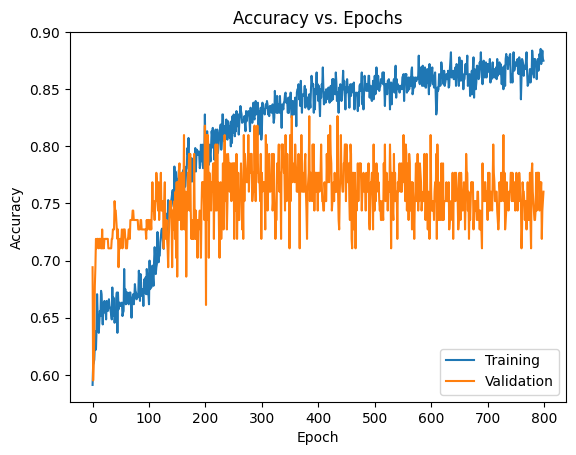

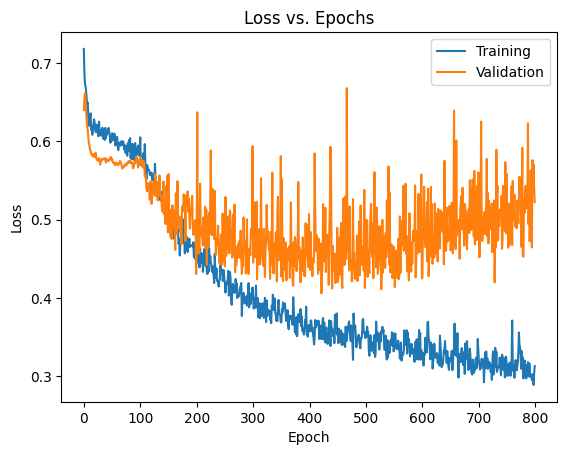

In [ ]:
plot_acc_loss(training_history_2)

In the new plots for the model we can see how in the regression the accuracy keeps increasing, we reach a part where the validation crosses the training accuracy, then the accuracy of the validation decreases considerably.

In the subsequent graph, the loss decreases in the training and at several points it crosses with the validation, but, we have that the loss in the validation increases again as in model 1, although we have apparently a better model, it still leaves much to be desired.

# Regularization using Callbacks: Earlystopping & learning rate reduction
Callback is a set of functions that allow to view internal states and statistics of the model during training

Early stopping interrupts training process if validation stops improving

Learning Rate Reduction reduces the learning rate when validation stops improving

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 30, mode =  "min") # if model doesn't improve its performance on validation set in 30 epochs, stop training
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience = 15, factor = 0.2)

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                640       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)    

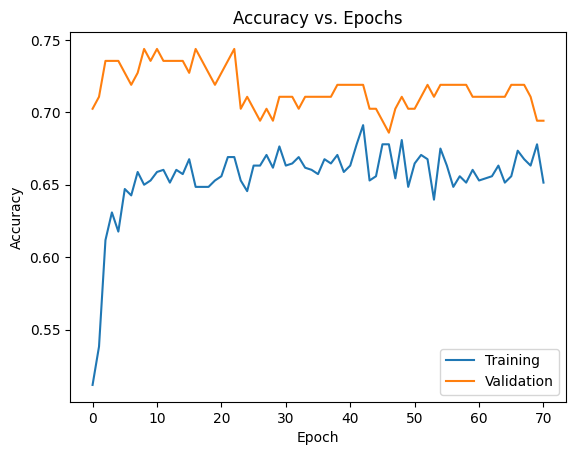

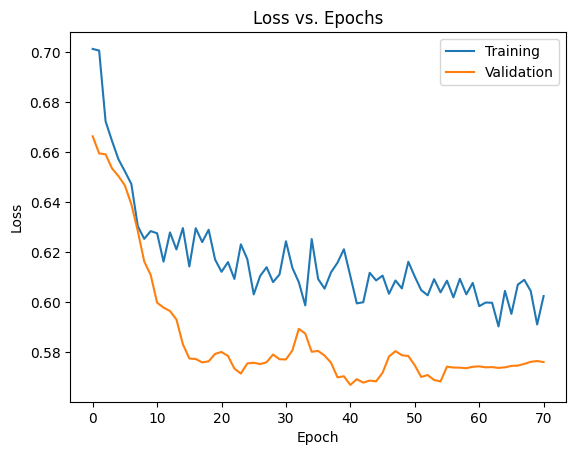

In [ ]:
model_3 = set_nn_model_architecture_2()
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

training_history_3 = model_3.fit(X_train_Sample, y_data, epochs=800, validation_split=0.15, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_3)

In this section of the code, two key strategies for training a neural network are applied. First, the Early Stopping technique is used using the EarlyStopping function. This strategy monitors model performance on a validation set and stops training if the validation loss does not improve for 30 consecutive epochs. This measure prevents overfitting and ensures efficient model convergence.

Secondly, "Learning Rate Reduction" (ReduceLROnPlateau) is employed using the ReduceLROnPlateau function. This technique dynamically adapts the learning rate during training. If the validation loss does not improve for 15 consecutive epochs, it reduces the learning rate by a factor of 0.2. This allows tuning the model performance and achieving better convergence.

After configuring these strategies, a second model called "Model 3" is defined. This model is compiled with a specific configuration, including an Adam optimizer and a learning rate of 0.0001, and trained for 800 epochs using the training data. During training, early stopping and learning rate reduction strategies are applied to ensure an efficient and controlled training process. Finally, model performance over time is visualized using accuracy and loss plots, which facilitates performance evaluation and model convergence during training. These strategies contribute to an effective and well-managed training process of the neural network, which is fundamental to obtain optimal results in machine learning.

In [ ]:
# Convert y_data to one-hot encoding for binary classification
y_test = to_categorical(y_test, num_classes=2)

# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(X_test_Sample, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.5958
test_acc: 67.7778 %


In [ ]:
# Make predictions for the new data
predictions = model_3.predict(Xt)

# The 'predictions' variable now contains the predicted probabilities for each class
# If it's a binary classification problem, you can extract the predicted class labels
predicted_labels = (predictions[:, 1] > 0.5).astype(int)  # Assuming class 1 is the positive class

# Print or use 'predicted_labels' as needed for further analysis
print(predicted_labels)

14/14 [==============================] - 0s 2ms/step
[0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 1]


In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predicted_labels})
output.to_csv("/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/TitanicModel.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
